#**Project Name: Fake News Detection and Evaluation with Confusion Matrix**
####**created by: Suprava Das**

# **Problem Statement:**


This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset cab also be downloaded from kaggle using the link: www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

# **Import Packages**

Imported all required libraries and installed any missing packages in Google Colab.

In [ ]:
# installed missing package gensim
!pip install gensim

In [ ]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Preprocessing**

In [ ]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/drive/My Drive/IDEAS-TIH/Internship_2025/Fake.csv')
true_news_data = pd.read_csv('/content/drive/My Drive/IDEAS-TIH/Internship_2025/True.csv')

**Q1.** View the imported csv file data using Pandas Dataframe.

In [28]:
import pandas as pd
fake_news_data = pd.read_csv('Fake.csv')
true_news_data = pd.read_csv('True.csv')
print("Fake News Sample:")
print(fake_news_data.head())
print("\nTrue News Sample:")
print(true_news_data.head())
print("\nFake News Shape:", fake_news_data.shape)
print("True News Shape:", true_news_data.shape)

Fake News Sample:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

True News Sample:
                                               title  \
0  As U.S. budget fight looms, Republicans flip

In [17]:
import pandas as pd

fake_news_data = pd.read_csv('Fake.csv')   
true_news_data = pd.read_csv('True.csv')

# Add label columns
fake_news_data['label'] = 'FAKE'
true_news_data['label'] = 'REAL'

# Combine datasets
data = pd.concat([fake_news_data, true_news_data], ignore_index=True)

# Shuffle data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check
print("Combined dataset shape:", data.shape)
print(data.head())

Combined dataset shape: (44898, 5)
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date label  
0    February 13, 2017  FAKE  
1       April 5, 2017   REAL  
2  September 27, 2017   REAL  
3         May 22, 2017  FAKE  
4       June 24, 2016   REAL  


In [ ]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [ ]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2.** drop rows from the dataset consisting null values.

In [34]:
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)       # remove links
    text = re.sub(r'[^a-zA-Z]', ' ', text)    # keep only letters
    text = text.lower()                       # lowercase
    text = text.split()
    return " ".join(text)
data['clean_text'] = data['text'].apply(clean_text)
data.head()

,title,text,subject,date,label,clean_text
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",FAKE,st century wire says ben stein reputable profe...
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",REAL,washington reuters u s president donald trump ...
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",REAL,reuters puerto rico governor ricardo rossello ...
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",FAKE,on monday donald trump once again embarrassed ...
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",REAL,glasgow scotland reuters most u s presidential...


**Q3.** shuffle the data.

In [35]:
import pandas as pd
fake_news_data['label'] = 1
true_news_data['label'] = 0
data = pd.concat([fake_news_data, true_news_data], ignore_index=True)
# Shuffle dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
# Output to check
print("First 5 rows after shuffle:")
print(data.head())
print("\nDataset shape:", data.shape)

First 5 rows after shuffle:
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      1  
1       April 5, 2017       0  
2  September 27, 2017       0  
3         May 22, 2017      1  
4       June 24, 2016       0  

Dataset shape: (44898

In [36]:
print(data.head())
print(data.shape)

                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      1  
1       April 5, 2017       0  
2  September 27, 2017       0  
3         May 22, 2017      1  
4       June 24, 2016       0  
(44898, 5)


In [ ]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

In [ ]:
# view top 10 rows of processed dataset
df.head(10)

,title,text,subject,date,class
0,"Head of Zimbabwe election commission quits, so...",HARARE (Reuters) - Zimbabwe Electoral Commissi...,worldnews,"December 8, 2017",0
1,House Speaker Ryan plans Harvey aid 'installme...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"September 1, 2017",0
2,SETH RICH MURDER Has CHILLING SIMILARITIES To ...,Just two months shy of the one-year anniversar...,left-news,"May 16, 2017",1
3,U.S. tax cuts won't make housing more affordab...,(Reuters) - The U.S. tax overhaul as currently...,politicsNews,"December 19, 2017",0
4,Bill Maher Shows America Why Donald Trump Mus...,Bill Maher is not shy about what he thinks of ...,News,"May 7, 2016",1
5,BREAKING! INVESTIGATION: Hillary Clinton Did N...,Was Hillary Clinton negligent or was she doin...,Government News,"May 25, 2016",1
6,China considers three-year jail terms for disr...,BEIJING (Reuters) - China s largely rubber-sta...,worldnews,"October 31, 2017",0
7,Trump administration blacklists three official...,WASHINGTON (Reuters) - The Trump administratio...,worldnews,"September 6, 2017",0
8,Watch NBC’s Andrea Mitchell Get BULLIED Out O...,"If one thing has become abundantly clear, it s...",News,"March 7, 2017",1
9,New York protesters camp out at Goldman Sachs ...,NEW YORK (Reuters) - Dozens of protesters gath...,politicsNews,"January 18, 2017",0


In [39]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)
data['clean_text'] = data['text'].apply(preprocess_text)
print(data[['text', 'clean_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  21st Century Wire says Ben Stein, reputable pr...   
1  WASHINGTON (Reuters) - U.S. President Donald T...   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3  On Monday, Donald Trump once again embarrassed...   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...   

                                          clean_text  
0  st century wire say ben stein reputable profes...  
1  washington reuters u president donald trump re...  
2  reuters puerto rico governor ricardo rossello ...  
3  monday donald trump embarrassed country accide...  
4  glasgow scotland reuters u presidential candid...  


**Q4.** view the text content of a random data point.

In [45]:
import random
# Pick a random index
rand_index = random.randint(0, len(data)-1)
print("Random Data Point Index:", rand_index)
print("Original Text (first 100 chars):", data['text'][rand_index][:100])
print("Preprocessed Text (first 100 chars):", data['clean_text'][rand_index][:100])

Random Data Point Index: 9542
Original Text (first 100 chars): BEDMINSTER, N.J. (Reuters) - President-elect Donald Trump and 2012 Republican presidential nominee M
Preprocessed Text (first 100 chars): bedminster n j reuters president elect donald trump republican presidential nominee mitt romney set 


**Data Visualization**

Text(0, 0.5, 'Number of News')

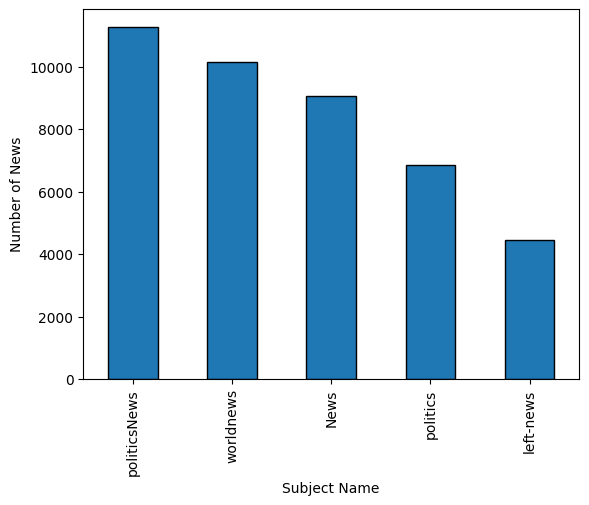

In [ ]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5.** Create a pie chart to find the pecentage of news on differenet subject.

Number of news articles per subject:
subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


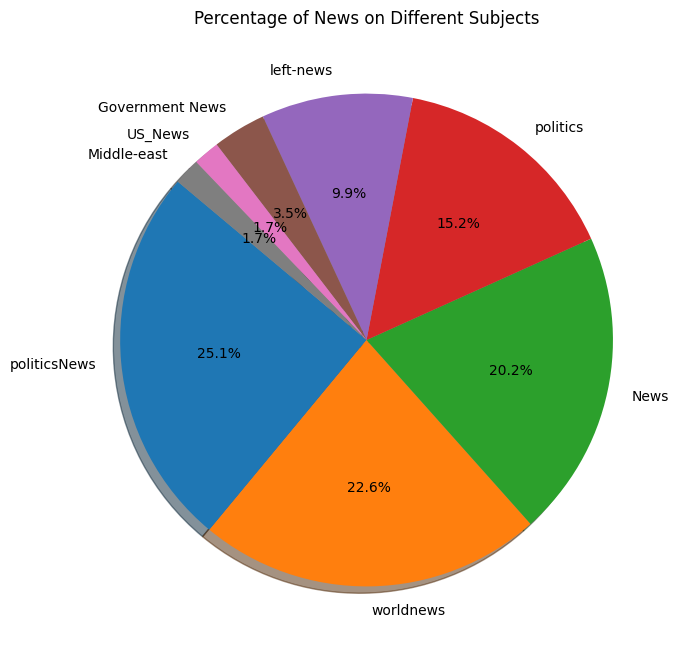

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
# Count number of news articles in each subject
subject_counts = data['subject'].value_counts()
print("Number of news articles per subject:")
print(subject_counts)
# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(subject_counts, 
        labels=subject_counts.index,      # Subject names
        autopct='%1.1f%%',                # Show percentages
        startangle=140,                    # Rotate start angle for better view
        shadow=True)                       # Optional: adds shadow
plt.title("Percentage of News on Different Subjects")
plt.show()

**Text Processing**

In [ ]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [ ]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [ ]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'donald trump has been in office for several months now and he still hasn t figured out the proper way to respond to a terrorist attack trump demonstrated his idiocy to the world earlier this week when he responded to the terrorist attack in london by using the tragedy as an opportunity to promote his muslim travel ban trump got blasted on social media for his disgusting insensitive response but top democrat nancy pelosi found the perfect way to slam trump by actually showing him how he should have responded unlike trump pelosi didn t blame london s mayor or use it to promote any agenda her response was completely presidential and serves as a perfect example of how trump should behave while completely humiliating him at the same time in a beautiful statement of solidarity pelosi said today the american people stand in solidarity with the people of the united kingdom and share in the shock and outrage of this brutal attack we send our thoughts and prayers to the fallen the injured and t

# **Building Model**

In [ ]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']

**Q6.** Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [ ]:
X = tfidf.fit_transform(data['clean_text'])  # Features
y = data['label']                            # Labels

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
# Features
X = tfidf.fit_transform(data['clean_text'])  # clean_text column should exist
y = data['label']
# Split dataset: 75% train, 25% test
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (33673, 5000)
Testing data shape: (11225, 5000)


## **Word Embedding ( Word2Vec )**

In [ ]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [ ]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [ ]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

##**Logistic Regression**

In [ ]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [1 1 1 ... 1 1 0]
Accuracy Score on Test Data:  0.9387973273942094


####**Accuracy Checking**

In [ ]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9387973273942094
Precision: 0.9442124603307166
Recall: 0.9412254412254413
F1 score: 0.9427165846743933


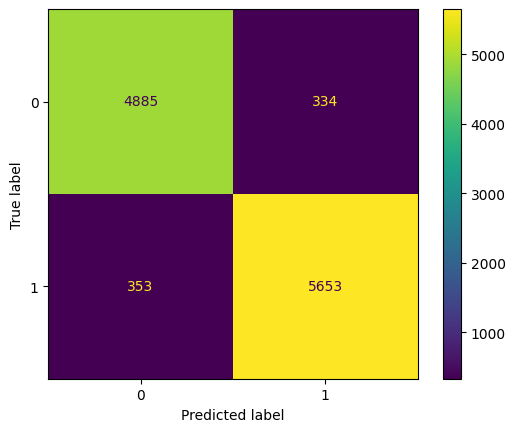

In [ ]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

##**Random Forest Classifier**

####**Model Building and Prediction**

**Q7.** Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Step 1: Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Step 2: Train model on training data
rf_model.fit(x_train, y_train)
# Step 3: Predict on test data
y_pred = rf_model.predict(x_test)
# Step 4: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Random Forest Accuracy: 0.9970601336302896

Confusion Matrix:
 [[5350   12]
 [  21 5842]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5362
           1       1.00      1.00      1.00      5863

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



####**Accuracy Checking**

**Q8.** Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.

Random Forest Performance Metrics:
Accuracy : 0.9969710467706013
Precision: 0.9966442953020134
Recall   : 0.9970160387914957
F1 Score : 0.9968301323885885


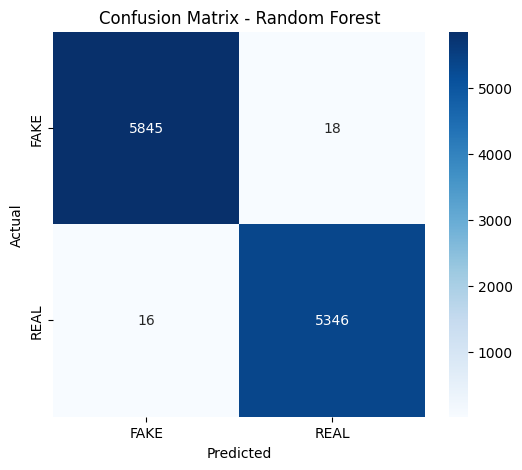

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='REAL')
recall = recall_score(y_test, y_pred, pos_label='REAL')
f1 = f1_score(y_test, y_pred, pos_label='REAL')

print("Random Forest Performance Metrics:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

# Step 2: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

#**Save the Model using pickle**

In [ ]:
# save the logistic regression model as pickle file
import pickle
filename1 = '/content/drive/My Drive/IDEAS-TIH/Internship_2025/word2vec_logistic_model.pickle'
pickle.dump(logistic_model, open(filename1, 'wb')) #word2vec model

In [ ]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9387973273942094


**Q9.** Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.

In [25]:
import pickle

# Step 1: Define filename for pickle file
filename = r'C:\Users\Karan\OneDrive\Desktop\fake-news-detection\random_forest_model.pickle'

# Step 2: Save the trained Random Forest model
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)

print("Random Forest model saved successfully at:", filename)

Random Forest model saved successfully at: C:\Users\Karan\OneDrive\Desktop\fake-news-detection\random_forest_model.pickle


In [26]:
# Load the saved model
with open(filename, 'rb') as file:
    loaded_rf_model = pickle.load(file)

# Test the loaded model
sample_prediction = loaded_rf_model.predict(x_test[:5])
print("Sample Predictions:", sample_prediction)

Sample Predictions: ['FAKE' 'REAL' 'REAL' 'FAKE' 'REAL']


**Q10.** Load that saved model in another Notebook use it on other dataset for fake news detection.

In [48]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load training dataset
df = pd.read_csv(r'C:\Users\Karan\OneDrive\Desktop\fake-news-detection\new_news_dataset.csv')
df.columns = ['title','text','label','date']

# Preprocess function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text.strip()

# Apply preprocessing
df['text_clean'] = df['text'].apply(preprocess_text)

# Training text ready
X_train_clean = df['text_clean']
y_train = df['label']

In [49]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train_clean)

# Save vectorizer
with open(r'C:\Users\Karan\OneDrive\Desktop\fake-news-detection\tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

print("TF-IDF vectorizer saved successfully!")

TF-IDF vectorizer saved successfully!


In [50]:
with open(r'C:\Users\Karan\OneDrive\Desktop\fake-news-detection\tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

In [51]:
new_df = pd.read_csv(r'C:\Users\Karan\OneDrive\Desktop\fake-news-detection\new_news_dataset.csv', header=None)
new_df.columns = ['title','text','category','date']

new_df['text_clean'] = new_df['text'].apply(preprocess_text)

In [52]:
X_new_vect = tfidf_vectorizer.transform(new_df['text_clean'])

In [54]:
model_path = r'C:\Users\Karan\OneDrive\Desktop\fake-news-detection\random_forest_model.pickle'
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

y_new_pred = loaded_model.predict(X_new_vect)
new_df['Prediction'] = y_new_pred
print(new_df.head())

                                               title  \
0  U.S. military to accept transgender recruits o...   
1  Senior U.S. Republican senator: 'Let Mr. Muell...   
2  FBI Russia probe helped by Australian diplomat...   
3  Trump wants Postal Service to charge 'much mor...   
4  White House, Congress prepare for talks on spe...   

                                                text      category  \
0  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
1  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
2  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
3  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
4  WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  politicsNews   

                 date                                         text_clean  \
0  December 29, 2017   washington reuters  transgender people will be...   
1  December 31, 2017   washington reuters  the special counsel invest...   
2  December 30

**Q11(Optional).**


1.  Try to enhance the model's accuracy by using adaboost or any other boosting methods.
2.  Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.






In [81]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder

In [82]:
df = pd.read_csv(r'C:\Users\Karan\OneDrive\Desktop\fake-news-detection\new_news_dataset.csv')

# Rename columns if needed
df.columns = ['title', 'text', 'label', 'date']  # label: 0=True, 1=Fake

In [83]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text.strip()

df['text_clean'] = df['text'].apply(preprocess_text)

In [84]:
X = df['text_clean']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [86]:
adaboost_model = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
adaboost_model.fit(X_train_tfidf, y_train)

y_pred_adaboost = adaboost_model.predict(X_test_tfidf)

# Evaluate
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_adaboost))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adaboost))

AdaBoost Accuracy: 1.0

Confusion Matrix:
 [[106]]

Classification Report:
               precision    recall  f1-score   support

politicsNews       1.00      1.00      1.00       106

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



C:\Users\Karan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [89]:
#Compare TF-IDF vs Word2Vec (
# Prepare tokenized sentences
tokenized_sentences = [text.split() for text in X_train]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert sentence to average Word2Vec vector
import numpy as np
def w2v_vector(text):
    words = text.split()
    word_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(word_vecs) == 0:
        return np.zeros(100)
    return np.mean(word_vecs, axis=0)

# Convert train & test data
X_train_w2v = np.array([w2v_vector(text) for text in X_train])
X_test_w2v = np.array([w2v_vector(text) for text in X_test])

In [88]:
adaboost_w2v = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
adaboost_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = adaboost_w2v.predict(X_test_w2v)

# Evaluate
print("AdaBoost + Word2Vec Accuracy:", accuracy_score(y_test, y_pred_w2v))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_w2v))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w2v))

AdaBoost + Word2Vec Accuracy: 1.0

Confusion Matrix:
 [[106]]

Classification Report:
               precision    recall  f1-score   support

politicsNews       1.00      1.00      1.00       106

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



C:\Users\Karan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
